<a href="https://colab.research.google.com/github/dimakpa/ML_Projects/blob/main/NYEnergy_regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача по предсказанию рейтинга энергопотребления здания в Нью-Йорке.


Первым делом загрузил данные за 2017 год на гугл диск, теперь подгрузим таблицу сюда

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(pd.read_excel("/content/drive/MyDrive/Colab Notebooks/nyc_benchmarking_disclosure_2017_consumption_data.xlsx", sheet_name='Information and Metrics'))

df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2 (self-reported),...,Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Water Required?,Generation Date,DOF Benchmarking Submission Status
0,1,4593574,The Argonaut Building,NaN,NaN,1.010288e+09,1010287502,1024898,224 West 57th St,NaN,...,NaN,NaT,732.4,76.3,656.1,3635.5,21.46,Not found,2018-02-14,Not found
1,3,2967701,Cathedral Preparatory Seminary,NaN,NaN,4.018720e+09,4-01872-0007,4046340,56-25 92nd Street,NaN,...,NaN,NaT,164.5,109.9,54.6,102.9,1.09,Not found,2018-02-14,Not found
2,4,4898531,The Nomad Hotel,NaN,NaN,1.008290e+09,1-00829-0050,1080710,1170 Broadway,NaN,...,NaN,NaT,1150.2,438.0,712.3,10762.6,86.10,Not found,2018-02-14,Not found
3,5,2917939,10 West 27 Street Corp,NaN,NaN,1.008280e+09,1-00828-0053,1015657,1155 Broadway,NaN,...,NaN,NaT,273.4,98.2,175.3,790.1,15.80,Not found,2018-02-14,Not found
4,6,3878205,Westbury Realty,NaN,NaN,1.000650e+09,1-00065-0024,1001105,24 John Street,NaN,...,NaN,NaT,90.7,0.0,90.7,143.0,2.86,Not found,2018-02-14,Not found


Колонок много, думаю нам все признаки не понадобятся. Поэтому проанализируем колонки (признаки), которые нам могут пригодится. В последнем листе есть информация о каждой колонке

In [ ]:
info = pd.DataFrame(pd.read_excel("/content/drive/MyDrive/Colab Notebooks/nyc_benchmarking_disclosure_2017_consumption_data.xlsx", sheet_name='Data Dictionary'))

info

,Field,Definition
0,Order,Order of BBLs on the disclosure data set
1,Property Id,Number assigned to each benchmarking submissio...
2,Property Name,Basic property information includes property n...
3,Parent Property Id,The ID for the campus is referred to as the Pa...
4,Parent Property Name,"When you are benchmark a campus (or, collectio..."
5,BBL - 10 digits,"10-digit property borough, block and lot ident..."
6,"NYC Borough, Block and Lot (BBL) self-reported","10-digit property borough, block and lot ident..."
7,NYC Building Identification Number (BIN),Self-reported seven-digit building identificat...
8,Address 1 (self-reported),Street Address 1 (self-reported)
9,Address 2,Street Address 2 (self-reported)


Перейдем к чистке данных от пустых ячеек. Посмотрим какую информацию содержит каждый признак

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34355 entries, 0 to 34354
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   Order                                                       34355 non-null  int64         
 1   Property Id                                                 34355 non-null  int64         
 2   Property Name                                               34355 non-null  object        
 3   Parent Property Id                                          1723 non-null   object        
 4   Parent Property Name                                        1723 non-null   object        
 5   BBL - 10 digits                                             33625 non-null  float64       
 6   NYC Borough, Block and Lot (BBL) self-reported              33626 non-null  object        
 7   NYC Building Identific

есть много Not Available среди числовых данных, поэтому первым делом изменим их на "не число" (Nan), которое воспринимается как число

In [ ]:
df= df.replace({'Not Available': np.nan})
df= df.replace({'Not found': np.nan})

Теперь признаки, которые определяются (Наны), как float, переделаем в float.

Но есть колонки с значением 'not found' которые вообще ни на что не влияют, потому что весь столбец заполнен этими значениями. Удалим эти столбцы. (Street Number, Street Name, DOF Gross Floor Area (ft²), Water Required?, DOF Benchmarking Submission Status)

In [ ]:
df = df.drop(['Street Number', 'Street Name', 'DOF Gross Floor Area (ft²)', 'Water Required?', 'DOF Benchmarking Submission Status'], axis=1)

In [ ]:
for col in list(df.columns):
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        df[col] = df[col].astype(float)

In [ ]:
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2 (self-reported),...,Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Generation Date
0,1,4593574,The Argonaut Building,NaN,NaN,1.010288e+09,1010287502,1024898,224 West 57th St,NaN,...,1920103.6,1920103.6,NaN,NaT,732.4,76.3,656.1,3635.5,21.46,2018-02-14
1,3,2967701,Cathedral Preparatory Seminary,NaN,NaN,4.018720e+09,4-01872-0007,4046340,56-25 92nd Street,NaN,...,180640.0,184131.9,NaN,NaT,164.5,109.9,54.6,102.9,1.09,2018-02-14
2,4,4898531,The Nomad Hotel,NaN,NaN,1.008290e+09,1-00829-0050,1080710,1170 Broadway,NaN,...,2354605.3,2354605.3,NaN,NaT,1150.2,438.0,712.3,10762.6,86.10,2018-02-14
3,5,2917939,10 West 27 Street Corp,NaN,NaN,1.008280e+09,1-00828-0053,1015657,1155 Broadway,NaN,...,579335.2,582516.1,NaN,NaT,273.4,98.2,175.3,790.1,15.80,2018-02-14
4,6,3878205,Westbury Realty,NaN,NaN,1.000650e+09,1-00065-0024,1001105,24 John Street,NaN,...,299809.9,299809.9,NaN,NaT,90.7,0.0,90.7,143.0,2.86,2018-02-14


Теперь все пропущенные значения или Not found - float.
Найдем пропущенные значения и выбросы.

В интернете есть классная функция для пропущенных значений в каждом столбце, используем ее

In [ ]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [ ]:
miss_values = missing_values_table(df)
miss_values

Your selected dataframe has 55 columns.
There are 43 columns that have missing values.


,Missing Values,% of Total Values
Propane Use (kBtu),34354,100.0
District Hot Water Use (kBtu),34347,100.0
District Chilled Water Use (kBtu),34325,99.9
Fuel Oil #1 Use (kBtu),34319,99.9
Diesel #2 Use (kBtu),34285,99.8
Address 2 (self-reported),33928,98.8
Fuel Oil #5 & 6 Use (kBtu),33871,98.6
District Steam Use (kBtu),32787,95.4
Parent Property Name,32632,95.0
Parent Property Id,32632,95.0


Признаки, в которых очень много пропусков вряд ли будут нужны и как-то повлияют, поэтому удалим признаки, у которых пропущенных значений больше 50%(процент для этой задачи)

In [ ]:
miss_values = miss_values.drop(['Missing Values'], axis=1)

Получили индексы (названия колонок нашего датасета), с помощью которых мы будем удалять колонки из нашей таблицы, потому что данные признаки нам точно не понадобятся, потому что ошибка там больше 50 %

In [ ]:
list_of_columns_to_drop = miss_values.index[miss_values['% of Total Values'] > 50].tolist()
list_of_columns_to_drop

['Propane Use (kBtu)',
 'District Hot Water Use (kBtu)',
 'District Chilled Water Use (kBtu)',
 'Fuel Oil #1 Use (kBtu)',
 'Diesel #2 Use (kBtu)',
 'Address 2 (self-reported)',
 'Fuel Oil #5 & 6 Use (kBtu)',
 'District Steam Use (kBtu)',
 'Parent Property Name',
 'Parent Property Id',
 'Fuel Oil #4 Use (kBtu)',
 'Annual Maximum Demand (kW)',
 'Annual Maximum Demand (MM/YYYY)',
 '3rd Largest Property Use Type',
 '3rd Largest Property Use Type - Gross Floor Area (ft²)',
 'Fuel Oil #2 Use (kBtu)',
 '2nd Largest Property Use - Gross Floor Area (ft²)',
 '2nd Largest Property Use Type',
 'Metered Areas  (Water)']

In [ ]:

for col_name in list_of_columns_to_drop:
    df = df.drop([col_name], axis=1)


# Если имеется лист колонок, которые нужно удалить, можно удалять так
# data = data.drop(columns = list(missing_columns))
df.head()

,Order,Property Id,Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Borough,Self-Reported Gross Floor Area (ft²),...,Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Generation Date
0,1,4593574,The Argonaut Building,1.010288e+09,1010287502,1024898,224 West 57th St,10019,Manhattan,169416.0,...,16672.2,6551394.1,1920103.6,1920103.6,732.4,76.3,656.1,3635.5,21.46,2018-02-14
1,3,2967701,Cathedral Preparatory Seminary,4.018720e+09,4-01872-0007,4046340,56-25 92nd Street,11373,Queens,94380.0,...,23243.7,616343.7,180640.0,184131.9,164.5,109.9,54.6,102.9,1.09,2018-02-14
2,4,4898531,The Nomad Hotel,1.008290e+09,1-00829-0050,1080710,1170 Broadway,10001-7507,Manhattan,125000.0,...,86776.9,8033914.4,2354605.3,2354605.3,1150.2,438.0,712.3,10762.6,86.10,2018-02-14
3,5,2917939,10 West 27 Street Corp,1.008280e+09,1-00828-0053,1015657,1155 Broadway,10001,Manhattan,50000.0,...,20520.9,1976691.9,579335.2,582516.1,273.4,98.2,175.3,790.1,15.80,2018-02-14
4,6,3878205,Westbury Realty,1.000650e+09,1-00065-0024,1001105,24 John Street,10038,Manhattan,50000.0,...,NaN,1022951.6,299809.9,299809.9,90.7,0.0,90.7,143.0,2.86,2018-02-14


Осталось всего 36 колонок, от начальных 60, которые могут нам как-то помочь.

Посмотрим на данные


In [ ]:
# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

Text(0.5, 1.0, 'Energy Star Score Distribution')

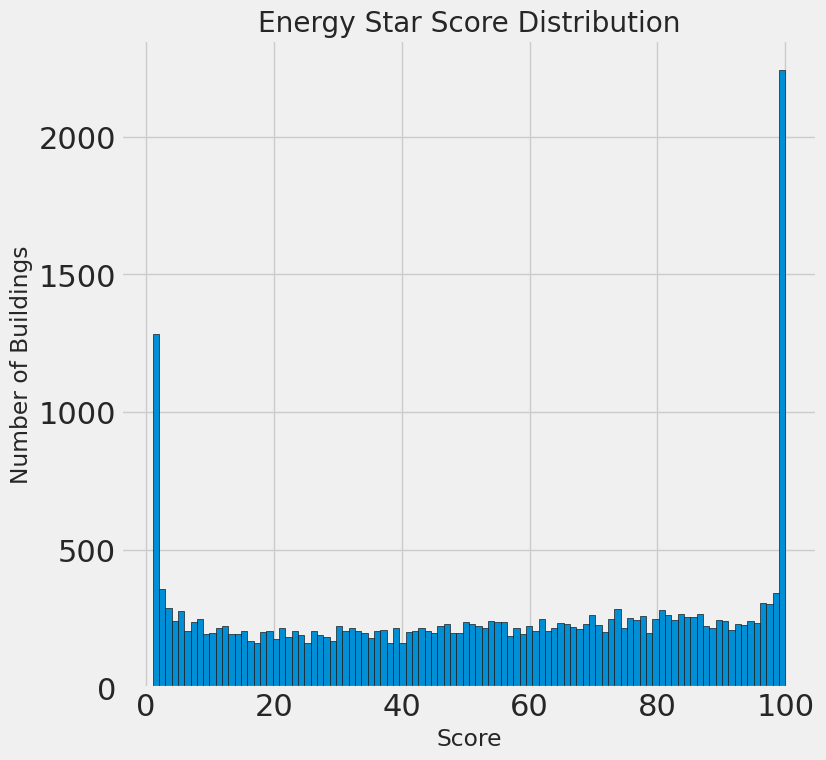

In [ ]:
figsize(8,8)

df = df.rename(columns = {'ENERGY STAR Score': 'score'})

plt.style.use('fivethirtyeight')
plt.hist(df['score'].dropna(), bins=100, edgecolor = 'k')
plt.xlabel('Score')
plt.ylabel('Number of Buildings')
plt.title('Energy Star Score Distribution')

Разберемся с выбросами. Посмотрим статистику

In [ ]:
df['Site EUI (kBtu/ft²)'].describe()

count    3.188800e+04
mean     9.922633e+02
std      1.349948e+05
min      0.000000e+00
25%      5.800000e+01
50%      7.990000e+01
75%      1.034000e+02
max      2.405806e+07
Name: Site EUI (kBtu/ft²), dtype: float64

In [ ]:
df['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

6613       143221.0
6606       143221.0
25533      206060.4
5295       252180.7
5289       252180.7
9244       252180.7
4584       252180.7
17884      328065.6
17883     1340295.0
20192    24058060.0
Name: Site EUI (kBtu/ft²), dtype: float64

Два здания имеют огромные значения... Посмотрим все остальное

In [ ]:
df.loc[df['Site EUI (kBtu/ft²)'] == 24058060, :]

,Order,Property Id,Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Borough,Self-Reported Gross Floor Area (ft²),...,Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Generation Date
20192,20406,5820492,65 broadway llc,1.000210e+09,1-00021-0004,1000809,65 broadway,10006,Manhattan,335184.0,...,NaN,23157732.2,6787142.2,6830963.1,535429700.0,0.0,535429700.0,NaN,NaN,2018-12-09


Данные странные, поэтому нам надо обработать все выбросы по правилам
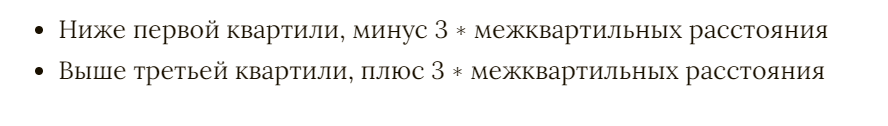

Гистограмма до приминения данного правила

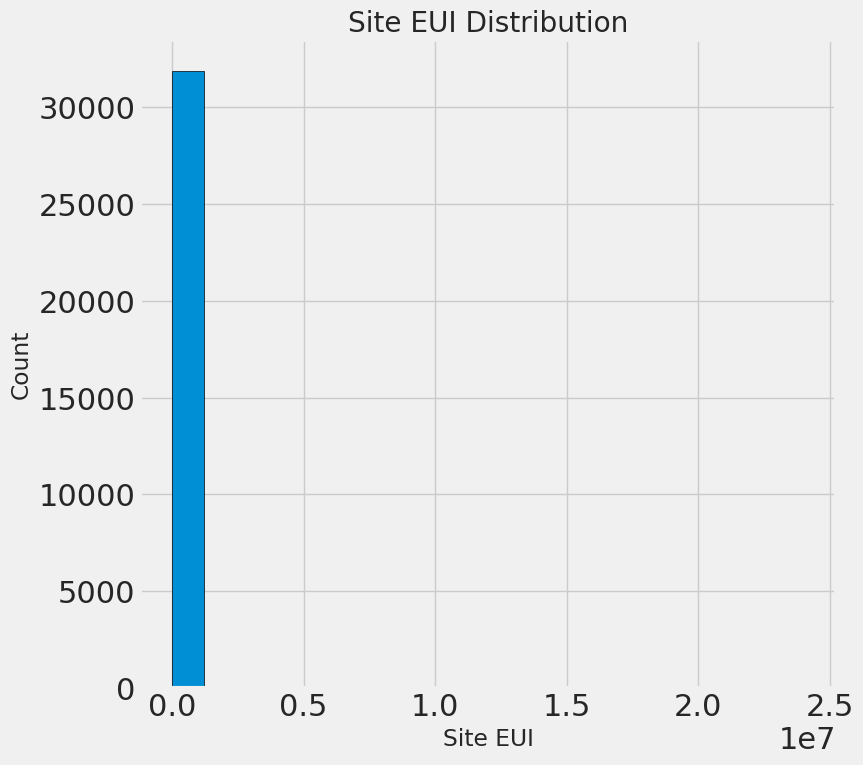

In [ ]:
figsize(8, 8)
plt.hist(df['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI');
plt.ylabel('Count'); plt.title('Site EUI Distribution');

In [ ]:
# Calculate first and third quartile
first_quartile = df['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = df['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
df = df[(df['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (df['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

Теперь построим гистограмму после применения критерия критического выброса

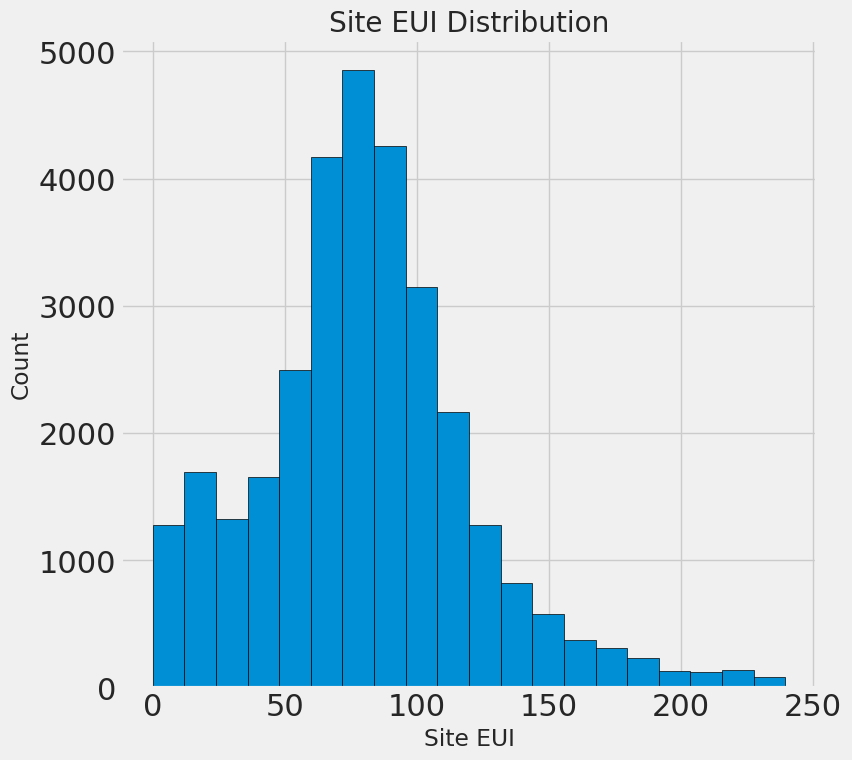

In [ ]:
figsize(8, 8)
plt.hist(df['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI');
plt.ylabel('Count'); plt.title('Site EUI Distribution');

Данные подозрительные, много зданий с плохим процентом отчетах об электроэнергии и много с хорошим. Отчет предоставляют сами жители -> Значения не объективны. (То же самое попросить поставить оценку школьнику самому себе)

"""Одним из способов оценить влияние значений категориальных признаков (число значений такого признака подразумевается конечным) на целевой — density plot, например, используя модуль seaborn.

Density plot можно представить себе как сглаженную гистограмму, потому что она показывает распределение одного значения категориально признака. Раскрасим распределения разными цветами и посмотрим на распределения. Код ниже строит density plot рейтинга энергопотребления. Разными цветами показаны рейтинги различных типов зданий (рассмотрены типы с как минимум сотней записей в нашем наборе):"""

In [ ]:
import seaborn as sns
sns.set(font_scale = 2)

Text(0.5, 1.0, 'Density Plot of Energy Star Scores by Building Type')

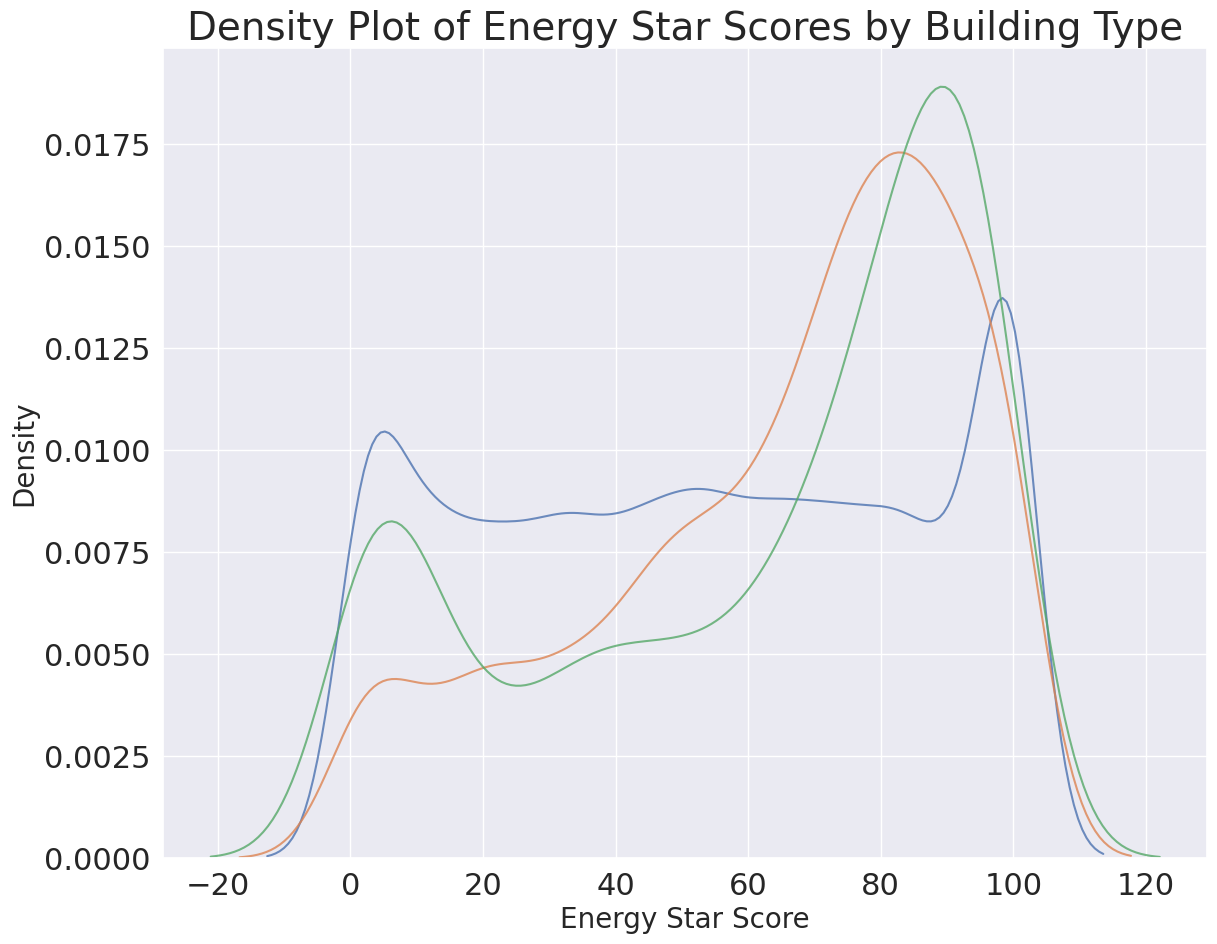

In [ ]:
types = df.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts() #Берем тип постройки
types = list(types[types.values > 500].index)

figsize(12, 10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = df[df['Largest Property Use Type'] == b_type]

    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, fill = False, alpha = 0.8);

# label the plot
plt.xlabel('Energy Star Score', size = 20)
plt.ylabel('Density', size = 20)
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28)

От типа постройки есть большая зависимость в энергопотреблении.

То же самое посмотрим для различных районов

Text(0.5, 1.0, 'Density Plot of Energy Star Scores by Borough')

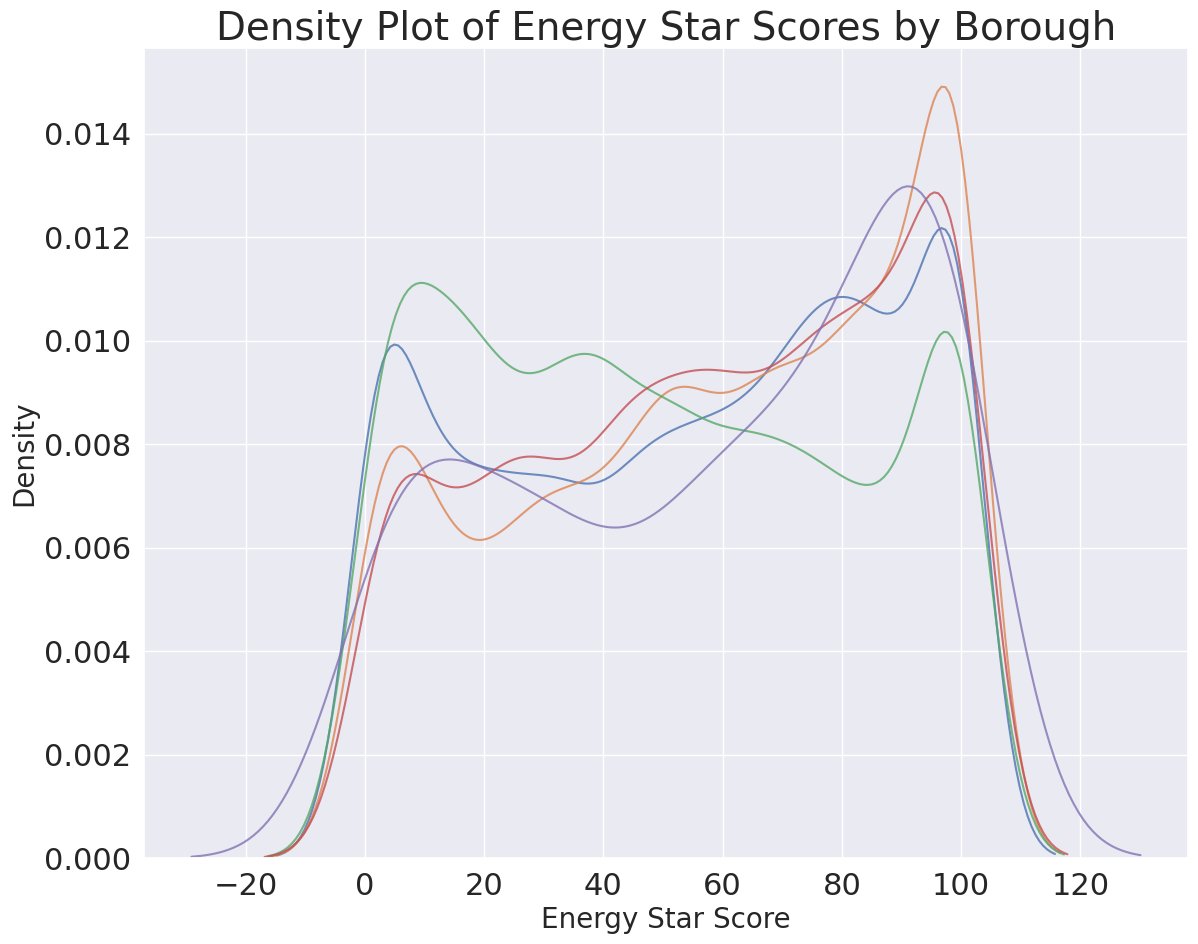

In [ ]:
borough = df.dropna(subset=['score'])
borough = borough['Borough'].value_counts() #Берем тип постройки
borough = list(borough[borough.values > 100].index) # Выбираем только те, которые упоминаются больше 100 раз

figsize(12, 10)

# Plot each building
for boroug in borough:
    # Select the building type
    subset = df[df['Borough'] == boroug]

    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = boroug, fill = False, alpha = 0.8);

# label the plot
plt.xlabel('Energy Star Score', size = 20)
plt.ylabel('Density', size = 20)
plt.title('Density Plot of Energy Star Scores by Borough', size = 28)

От района не так сильно зависит энергопотребление, однако разница есть, поэтому можно включить в модель данный признак.

Чтобы численно оценить степень влияния признаков можно использовать коэффициент корреляции Пирсона. Это мера степени и положительности линейных связей между двумя переменными.  Значение в +1 означает идеальную пропорциональность между значениями признаков и, соответственно, в -1 аналогично, но с отрицательным коэффициентом.

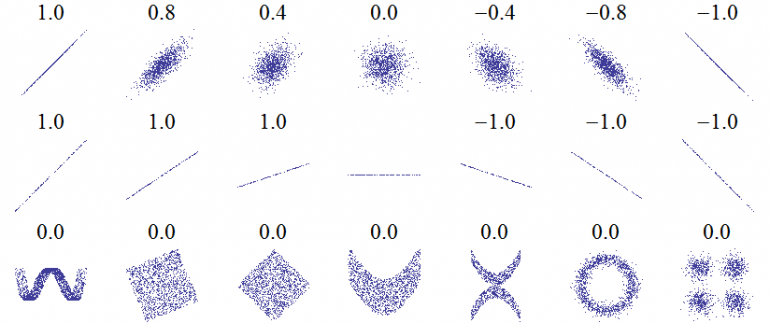

В Pandas легко рассчитать степень корреляции

In [ ]:
correlations_data = df.corr()['score'].sort_values()
correlations_data

<ipython-input-143-58999a8a4af7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_data = df.corr()['score'].sort_values()


Site EUI (kBtu/ft²)                                          -0.764947
Weather Normalized Site EUI (kBtu/ft²)                       -0.759865
Weather Normalized Source EUI (kBtu/ft²)                     -0.676350
Source EUI (kBtu/ft²)                                        -0.664716
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.477838
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.349015
Property Id                                                  -0.138856
Order                                                        -0.098902
Direct GHG Emissions (Metric Tons CO2e)                      -0.094196
Weather Normalized Site Natural Gas Use (therms)             -0.080714
Natural Gas Use (kBtu)                                       -0.079888
Total GHG Emissions (Metric Tons CO2e)                       -0.068426
Occupancy                                                    -0.048963
Electricity Use - Grid Purchase (kWh)                        -0.018676
Electr

То есть самые маленькие и самые высокие признаки мы можем использовать для обучения. Сильно маленькие коэфициенты Пирсона чаще всего являются обратными -> в модельке могут помочь в обучении.

In [ ]:
df.columns

Index(['Order', 'Property Id', 'Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Postal Code', 'Borough', 'Self-Reported Gross Floor Area (ft²)',
       'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings', 'Occupancy', 'Metered Areas (Energy)', 'score',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'E

Чтобы учесть возможные нелинейные отношения, мы можем взять квадратный корень и натуральное логарифмическое преобразование признаков, а затем вычислить коэффициенты корреляции с оценкой. Чтобы попытаться зафиксировать любые возможные взаимосвязи между районом или типом здания и оценкой, нам нужно будет закодировать эти столбцы сразу.

Выбираем столбцы с числами

In [ ]:
numeric_subset = df.select_dtypes('number')

Создаем столбцы с квадратным корнем и логарифмом этих значений

In [ ]:
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = geta

Применяем oneHotEncoding

In [ ]:
categorical_subset = df[['Borough', 'Largest Property Use Type']]
# categorical_subset.head(5)
# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)
categorical_subset.head(7)


,Borough_BRONX,Borough_BROOKLYN,Borough_Bronx,Borough_Brooklyn,Borough_Manhattan,Borough_Patchogue,Borough_QUEENS,Borough_Queens,Borough_Staten Island,Borough_bronx,...,Largest Property Use Type_Stadium (Open),Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Transportation Terminal/Station,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Vocational School,Largest Property Use Type_Wastewater Treatment Plant,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility,Largest Property Use Type_Zoo
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Соединяем два столбца и находим кореляцию

In [ ]:
features = pd.concat([numeric_subset, categorical_subset], axis = 1)
features.head(5)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])


# Find correlations with the score
correlations = features.corr()['score'].dropna().sort_values()
features.columns

Index(['Order', 'Property Id', 'BBL - 10 digits',
       'Self-Reported Gross Floor Area (ft²)',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings', 'Occupancy', 'score', 'Source EUI (kBtu/ft²)',
       ...
       'Largest Property Use Type_Stadium (Open)',
       'Largest Property Use Type_Strip Mall',
       'Largest Property Use Type_Supermarket/Grocery Store',
       'Largest Property Use Type_Transportation Terminal/Station',
       'Largest Property Use Type_Urgent Care/Clinic/Other Outpatient',
       'Largest Property Use Type_Vocational School',
       'Largest Property Use Type_Wastewater Treatment Plant',
       'Largest Property Use Type_Wholesale Club/Supercenter',
       'Largest Property Use Type_Worship Facility',
       'Largest Property Use Type_Zoo'],
      dtype='object', length=150)

In [ ]:
# Display most negative correlations
correlations.head(15)

Site EUI (kBtu/ft²)                                               -0.764947
Weather Normalized Site EUI (kBtu/ft²)                            -0.759865
sqrt_Site EUI (kBtu/ft²)                                          -0.754405
sqrt_Weather Normalized Site EUI (kBtu/ft²)                       -0.748839
sqrt_Weather Normalized Source EUI (kBtu/ft²)                     -0.716912
sqrt_Source EUI (kBtu/ft²)                                        -0.709354
Weather Normalized Source EUI (kBtu/ft²)                          -0.676350
Source EUI (kBtu/ft²)                                             -0.664716
log_Site EUI (kBtu/ft²)                                           -0.663572
log_Weather Normalized Site EUI (kBtu/ft²)                        -0.657328
log_Weather Normalized Source EUI (kBtu/ft²)                      -0.650812
log_Source EUI (kBtu/ft²)                                         -0.648899
Weather Normalized Site Natural Gas Intensity (therms/ft²)        -0.477838
sqrt_Weather

некоторые логорифмические функции показали хорошую отрицательную зависимость, это хорошо

In [ ]:
features.head(5)

,Order,Property Id,BBL - 10 digits,Self-Reported Gross Floor Area (ft²),Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings,Occupancy,score,Source EUI (kBtu/ft²),...,Largest Property Use Type_Stadium (Open),Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Transportation Terminal/Station,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Vocational School,Largest Property Use Type_Wastewater Treatment Plant,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility,Largest Property Use Type_Zoo
0,1,4593574,1.010288e+09,169416.0,164754.0,1909,1,95,90.0,138.4,...,0,0,0,0,0,0,0,0,0,0
1,3,2967701,4.018720e+09,94380.0,94380.0,1963,1,100,100.0,43.5,...,0,0,0,0,0,0,0,0,0,0
2,4,4898531,1.008290e+09,125000.0,125000.0,1999,1,85,83.0,271.1,...,0,0,0,0,0,0,0,0,0,0
3,5,2917939,1.008280e+09,50000.0,50000.0,1994,1,100,27.0,163.0,...,0,0,0,0,0,0,0,0,0,0
4,6,3878205,1.000650e+09,50000.0,50000.0,2012,1,0,99.0,64.2,...,0,0,0,0,0,0,0,0,0,0


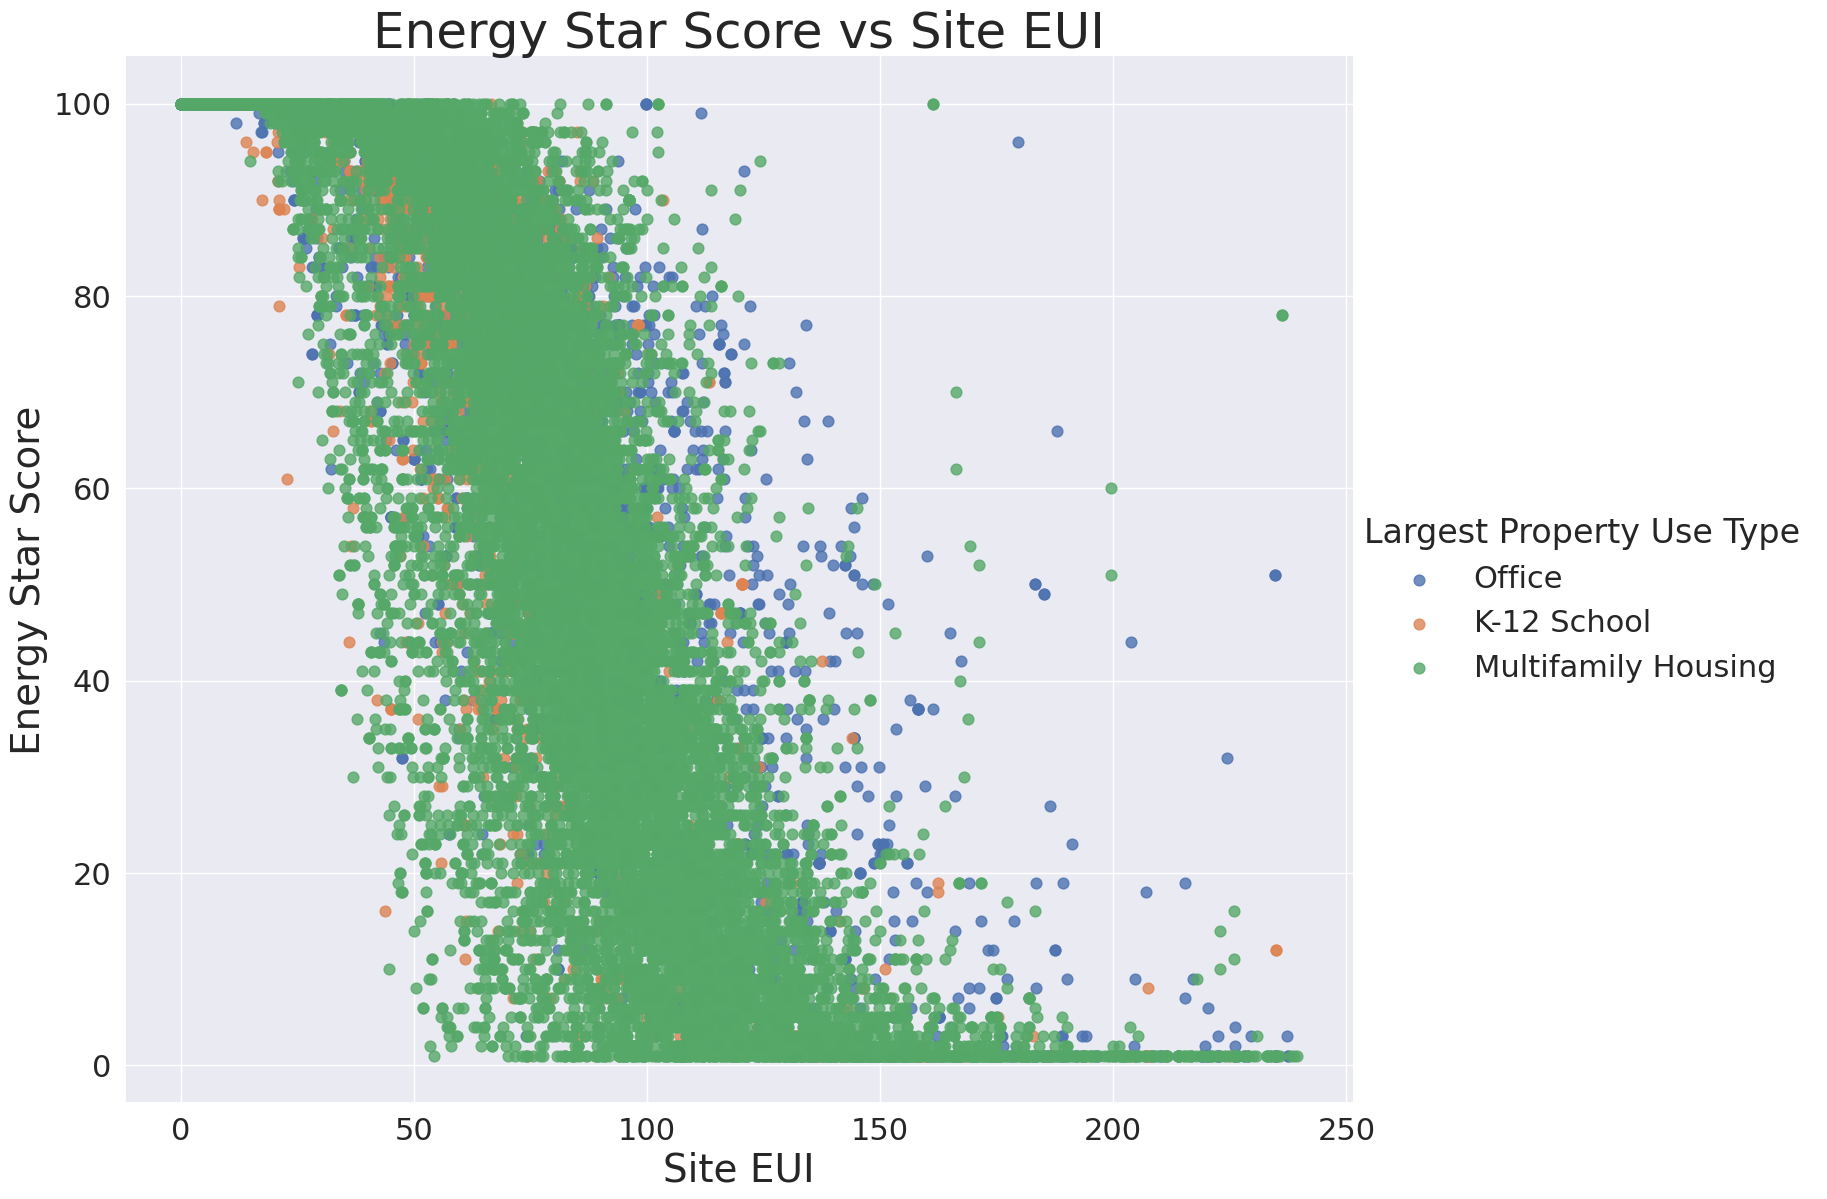

In [ ]:
figsize(12, 10)
# features.head(5)
# Extract the building types
features['Largest Property Use Type'] = df.dropna(subset = ['score'])['Largest Property Use Type']

# # Limit to building types with more than 100 observations (from previous code)
features = features[features['Largest Property Use Type'].isin(types)]
features.head(5)
# df_new = features
# df_new
# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot(x='Site EUI (kBtu/ft²)',y='score',
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60},
           fit_reg = False,
           height = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);

Выбросы не давали построить нормальный график. Устранил выбросы через экстримальные выбросы https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm

In [ ]:
features.columns


Index(['Order', 'Property Id', 'BBL - 10 digits',
       'Self-Reported Gross Floor Area (ft²)',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings', 'Occupancy', 'score', 'Source EUI (kBtu/ft²)',
       ...
       'Largest Property Use Type_Strip Mall',
       'Largest Property Use Type_Supermarket/Grocery Store',
       'Largest Property Use Type_Transportation Terminal/Station',
       'Largest Property Use Type_Urgent Care/Clinic/Other Outpatient',
       'Largest Property Use Type_Vocational School',
       'Largest Property Use Type_Wastewater Treatment Plant',
       'Largest Property Use Type_Wholesale Club/Supercenter',
       'Largest Property Use Type_Worship Facility',
       'Largest Property Use Type_Zoo', 'Largest Property Use Type'],
      dtype='object', length=151)

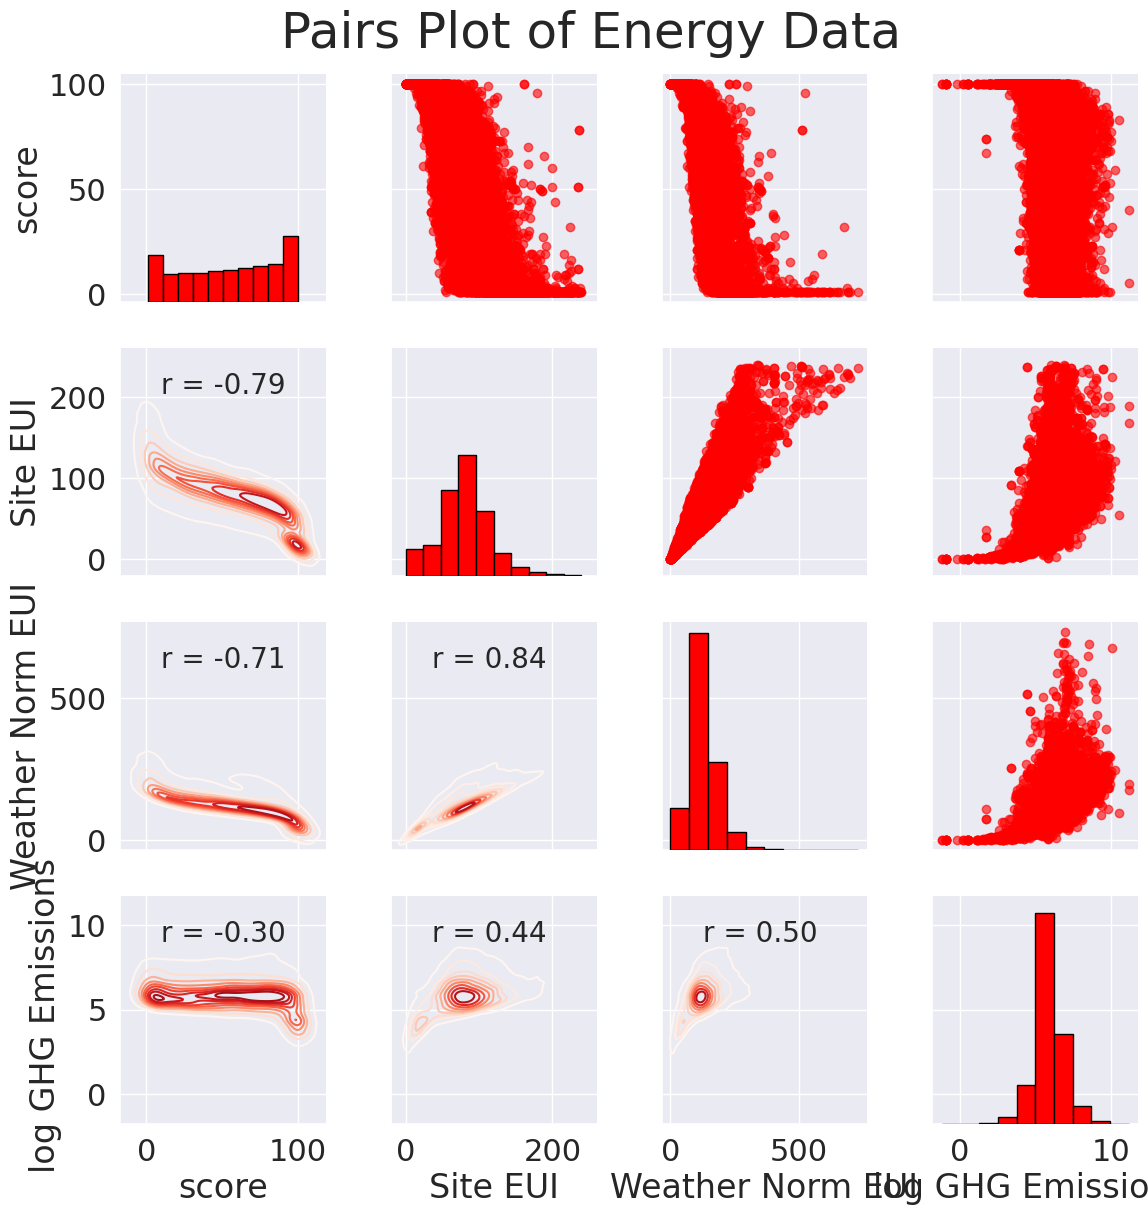

In [ ]:
# Extract the columns to  plot
plot_data = features[['score', 'Site EUI (kBtu/ft²)',
                      'Weather Normalized Source EUI (kBtu/ft²)',
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI',
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions '})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, height = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

Посмотрели на данные, изучили, посмотрели зависимости, теперь пора приступать к выбору признаков.

1. Выберем числовые признаки и два категориальных
2. Добавим в лог преобразование числовых данных
3. Для категориальных признаков будем использовать One-Hot encode


In [ ]:
# Скопируем данные
features = df.copy()

# Выберем только числовые колонки
numeric_subset = df.select_dtypes('number')

# Создадим логарифмические колонки из выбранных чисел
for col in numeric_subset.columns:
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = geta

Теперь разберемся с категориальными признаками

In [ ]:
# Select the categorical columns
categorical_subset = df[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

(31104, 126)

На данный момент у нас есть 31104 наблюдений (зданий) со 126 различными функциями (один столбец — оценка). Не все из этих признаков, вероятно, будут важны для прогнозирования оценки, а некоторые из этих признаков также избыточны, поскольку они сильно коррелированы. Мы рассмотрим этот второй вопрос ниже.

Придется удалять коллинеарные объекты, тк они имеют примерно одинаковый коэфициент корреляции.

Text(0.5, 1.0, 'Weather Norm EUI vs Site EUI, R = 0.9979')

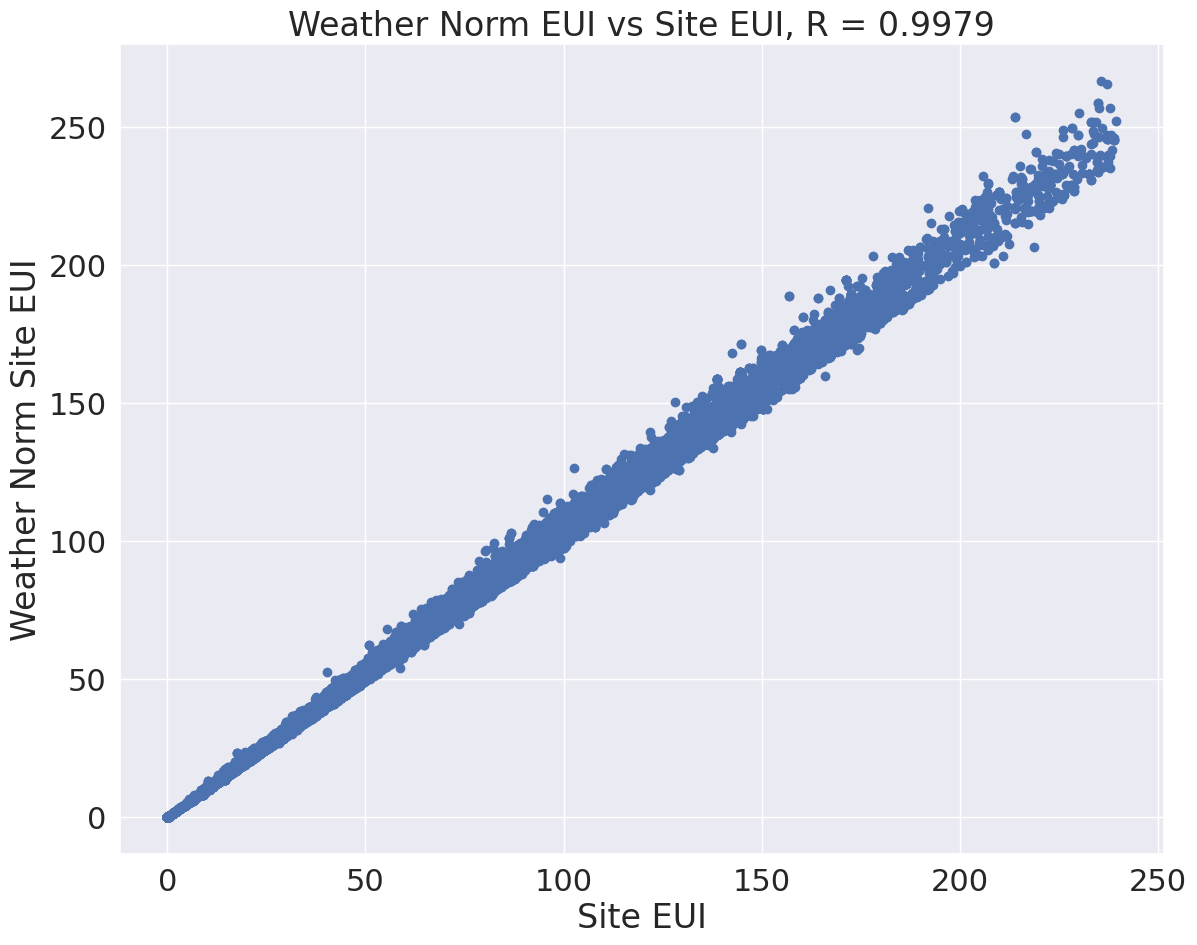

In [ ]:
plot_data = features[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI')
plt.ylabel('Weather Norm Site EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(features[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1])



По графику видим, что эти данные сильно коллениарны. Если использовать коллинеарные данные, это усложнит модель. После удаления мы будем беспокоится всего лишь за один признак из двух. Есть множество способов удаления таких признаков, например метод использование коэфициента корреляции дисперсии.

Следующая функция удаляет коррелирующие признаки с заданным значением.
x - датасет, threshold - коэф корреляции

In [ ]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.

    Inputs:
        threshold: any features with correlations greater than this value are removed

    Output:
        dataframe that contains only the non-highly-collinear features
    '''

    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'], axis=1)

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops, axis=1)
    # x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)',
    #                       'Water Use (All Water Sources) (kgal)',
    #                       'log_Water Use (All Water Sources) (kgal)',
    #                       'Largest Property Use Type - Gross Floor Area (ft²)'], axis=1)

    # Add the score back in to the data
    x['score'] = y

    return x

Удалим коррелирующие признаки

In [ ]:
features = remove_collinear_features(df, 0.6);

<ipython-input-157-c38c850e454c>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = x.corr()


In [ ]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(31104, 24)

Это наш окончательный набор данных, который мы получили. Теперь нужно разделить выборку на обучающую и тестовую.

### **Разделение данных на тестовую и тренировочну подвыборки**

У нас есть здания без значения score, так что они при обучении полезны не будут. Найдем количество таких данных.

In [ ]:
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(6130, 24)
(24974, 24)


Потерялись категориальные столбцы, за чем мы не уследили Borough

In [ ]:
categorical_subset = df[['Borough', 'Largest Property Use Type']]
# categorical_subset.head(5)
# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)
categorical_subset.head(7)

,Borough_BRONX,Borough_BROOKLYN,Borough_Bronx,Borough_Brooklyn,Borough_Manhattan,Borough_Patchogue,Borough_QUEENS,Borough_Queens,Borough_Staten Island,Borough_bronx,...,Largest Property Use Type_Stadium (Open),Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Transportation Terminal/Station,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Vocational School,Largest Property Use Type_Wastewater Treatment Plant,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility,Largest Property Use Type_Zoo
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.concat([df, categorical_subset], axis=1)
df.head(5)

,Order,Property Id,Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Borough,Self-Reported Gross Floor Area (ft²),...,Largest Property Use Type_Stadium (Open),Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Transportation Terminal/Station,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Vocational School,Largest Property Use Type_Wastewater Treatment Plant,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility,Largest Property Use Type_Zoo
0,1,4593574,The Argonaut Building,1.010288e+09,1010287502,1024898,224 West 57th St,10019,Manhattan,169416.0,...,0,0,0,0,0,0,0,0,0,0
1,3,2967701,Cathedral Preparatory Seminary,4.018720e+09,4-01872-0007,4046340,56-25 92nd Street,11373,Queens,94380.0,...,0,0,0,0,0,0,0,0,0,0
2,4,4898531,The Nomad Hotel,1.008290e+09,1-00829-0050,1080710,1170 Broadway,10001-7507,Manhattan,125000.0,...,0,0,0,0,0,0,0,0,0,0
3,5,2917939,10 West 27 Street Corp,1.008280e+09,1-00828-0053,1015657,1155 Broadway,10001,Manhattan,50000.0,...,0,0,0,0,0,0,0,0,0,0
4,6,3878205,Westbury Realty,1.000650e+09,1-00065-0024,1001105,24 John Street,10038,Manhattan,50000.0,...,0,0,0,0,0,0,0,0,0,0


Разделим признаки и целевые значения

In [ ]:
df.columns

Index(['Order', 'Property Id', 'Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Postal Code', 'Borough', 'Self-Reported Gross Floor Area (ft²)',
       ...
       'Largest Property Use Type_Stadium (Open)',
       'Largest Property Use Type_Strip Mall',
       'Largest Property Use Type_Supermarket/Grocery Store',
       'Largest Property Use Type_Transportation Terminal/Station',
       'Largest Property Use Type_Urgent Care/Clinic/Other Outpatient',
       'Largest Property Use Type_Vocational School',
       'Largest Property Use Type_Wastewater Treatment Plant',
       'Largest Property Use Type_Wholesale Club/Supercenter',
       'Largest Property Use Type_Worship Facility',
       'Largest Property Use Type_Zoo'],
      dtype='object', length=113)

In [ ]:
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

Замениваем булевые функции true и false на Nan на числовые

In [ ]:
# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

И делим 70 на 30, 70 - тренировочные, 30 - тестовые

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(17481, 23)
(7493, 23)
(17481, 1)
(7493, 1)


Теперь установим значения, которые нам нужно превзойти. То есть какие-то метрики. Для линейной регрессии самой простой является медианное значение цели.
Мы будем использовать среднюю абсолютную MAE - Mean Absolute Error

`Существует ряд метрик, используемых в задачах машинного обучения, и может быть трудно понять, какую из них выбрать. В большинстве случаев это будет зависеть от конкретной проблемы и от того, есть ли у вас конкретная цель оптимизации. Мне нравится совет Эндрю Нг использовать единую реальную метрику производительности для сравнения моделей, потому что это упрощает процесс оценки. Вместо того, чтобы вычислять несколько показателей и пытаться определить, насколько важен каждый из них, мы должны использовать одно число. В этом случае, поскольку мы проводим регрессию, средняя абсолютная ошибка является подходящей метрикой. Это также можно интерпретировать, поскольку оно представляет собой среднюю сумму, которую мы оцениваем, если она отличается в тех же единицах, что и целевое значение. `

Функция, которая считает МАЕ

In [ ]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

Теперь посчитаем базовое предположение и используя данную функцию посчитаем Базовая производительность на тестовом наборе

In [ ]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 57.00
Baseline Performance on the test set: MAE = 27.9674


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


это показывает, что наша средняя оценка отличается примерно на 27 пункток -> средняя ошибка наивного метода составляет около 27% Наивный метод угадывания среднего значения обучения дает нам низкий базовый уровень для наших моделей

1. Мы очистили и отформатировали данные
2. Провели анализ данных
3. Выбрали признаки, по которым будем строить модель и разбили на данные

Сохраним данные тестовой и тренировочной выборки на диск

In [ ]:
no_score.to_csv('/content/drive/MyDrive/Colab Notebooks/NYEnergyRegressionData/no_score.csv', index = False)
X.to_csv('/content/drive/MyDrive/Colab Notebooks/NYEnergyRegressionData/training_features.csv', index = False)
X_test.to_csv('/content/drive/MyDrive/Colab Notebooks/NYEnergyRegressionData/testing_features.csv', index = False)
y.to_csv('/content/drive/MyDrive/Colab Notebooks/NYEnergyRegressionData/training_labels.csv', index = False)
y_test.to_csv('/content/drive/MyDrive/Colab Notebooks/NYEnergyRegressionData/testing_labels.csv', index = False)